# London Crime Dataset

This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data.

## Exploring Dataset

Import library yang dibutuhkan untuk tahap awal pengolahan dataset

In [1]:
import numpy as np  
import pandas as pd

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Dari dataset ini dapat diketahui terdapat 13490604 baris dan 7 kolom

In [3]:
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.tail(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


Kemudian akan dilihat berupa basic information dari dataset ini.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Dataset ini terdiri dari tipe data object dan integer

In [6]:
# Describe tipe data Integer
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [7]:
# Describe tipe data Object
df.describe(include=[object])

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Other Theft
freq,3456,602100,3966300,522180


Lalu kita akan melihat berupa list column dan index.

In [8]:
df.columns.values 

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [9]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

Akan dilihat seberapa unik value pada setiap kolom untuk menggambarkan karakteristik masing-masing kolom.

In [10]:
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [11]:
df['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [12]:
df['major_category'].value_counts()

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

In [13]:
df['minor_category'].value_counts()

Other Theft                               522180
Common Assault                            522180
Theft From Motor Vehicle                  522180
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Burglary in Other Buildings               522072
Criminal Damage To Motor Vehicle          521964
Other Criminal Damage                     521856
Assault with Injury                       521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

Kemudian, akan dicek apakah terdapat missing value dan duplicated pada dataset ini.

In [14]:
# Melihat apakah terdapat missing value
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [15]:
# Melihat apakah terdapat duplicated data
df.duplicated().sum()

0

Tidak terdapat missing value dan duplicated sehingga dataset ini dapat dikatakan sudah bersih

## Pre-processing Dataset

Akan dilakukan penghapusan kolom lsoa_code dan minor_category, karena pada studi kasus ini akan difokuskan kepada major_category

In [16]:
df_1 = df.copy()
df_1.drop(['lsoa_code','minor_category'], axis=1, inplace=True)
df_1

,borough,major_category,value,year,month
0,Croydon,Burglary,0,2016,11
1,Greenwich,Violence Against the Person,0,2016,11
2,Bromley,Violence Against the Person,0,2015,5
3,Redbridge,Burglary,0,2016,3
4,Wandsworth,Robbery,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015,2
13490600,Hillingdon,Robbery,1,2015,6
13490601,Sutton,Burglary,0,2011,2
13490602,Croydon,Robbery,0,2011,5


Kemudian dilakukan groupby dan pivot_table untuk mendapatkan total value setiap tahunnya berdasarkan jenis major_category yang ada.

In [17]:
df_sum = df_1.groupby(['year','borough']).size().reset_index(name='count_per_year')
print(df_sum)
print(df_sum.columns)

     year               borough  count_per_year
0    2008  Barking and Dagenham           34560
1    2008                Barnet           63648
2    2008                Bexley           42852
3    2008                 Brent           54516
4    2008               Bromley           58212
..    ...                   ...             ...
292  2016                Sutton           35832
293  2016         Tower Hamlets           45792
294  2016        Waltham Forest           45144
295  2016            Wandsworth           55404
296  2016           Westminster           40740

[297 rows x 3 columns]
Index(['year', 'borough', 'count_per_year'], dtype='object')


In [18]:
london_crime_majc = df_1.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
london_crime_majc

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


## Library Matplotlib

In [19]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

---
# A. Area Plot

**Question**: Apa 2 jenis kejahatan major_category paling banyak yang terjadi di London selama tahun 2008-2016?

**Create data visualization**

Membuat area plot menggunakan Matplotlib

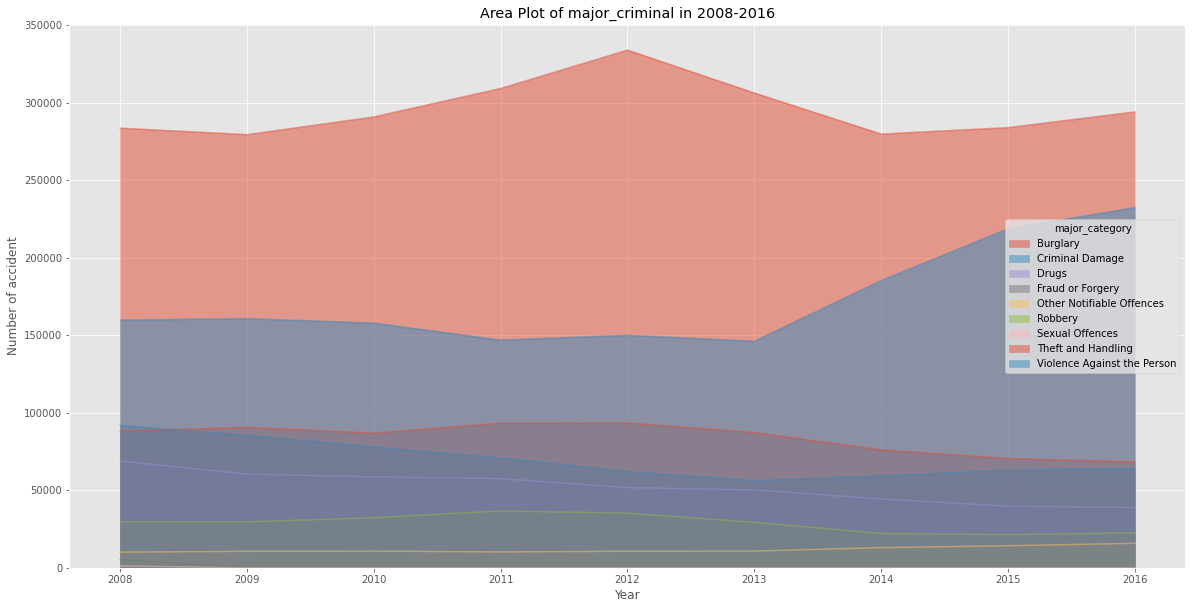

In [21]:
# Create Area Plot
london_crime_majc.plot(kind='area',
alpha=0.5,
stacked=False,
figsize=(20, 10), 
)

plt.title('Area Plot of major_criminal in 2008-2016') 
plt.ylabel('Number of accident') 
plt.xlabel('Year')

plt.show()

**Conclusion**



Dari Area Plot yang terbentuk dapat disimpulkan bahwa 2 kejahatan major_category paling banyak terjadi di London selama tahun 2008-2016 adalah:

1. Theft and Handling
2. Violenece Against the Person

---
# B. Histogram

**Question:** Tampilkan histogram untuk major_category (Burglary, Criminal Damage dan Drugs). Bandingkan dari ketiganya dan tentukan jenis kejahatan mana yang memiki frekuensi terbanyak selama 1 tahun dari 2008-2016?

**Create data visualization**

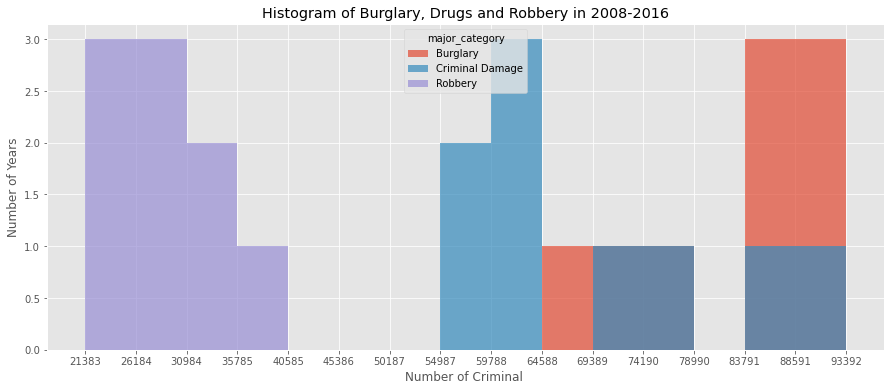

In [23]:
# Create Histogram (bin=15)

# Memilih kolom jenis kejahatan sesuai pertanyaan
df_hist = london_crime_majc[['Burglary','Criminal Damage','Robbery']]

count, bin_edges = np.histogram(df_hist, 15)
df_hist.plot(kind ='hist',
    figsize=(15, 6),
    bins=15,
    alpha=0.7,
    xticks=bin_edges,
    )

plt.title('Histogram of Burglary, Drugs and Robbery in 2008-2016') 
plt.ylabel('Number of Years') 
plt.xlabel('Number of Criminal ') 

plt.show()

Akan diubah bin menjadi bin=55 untuk melihat seberapa detail histogramnya.

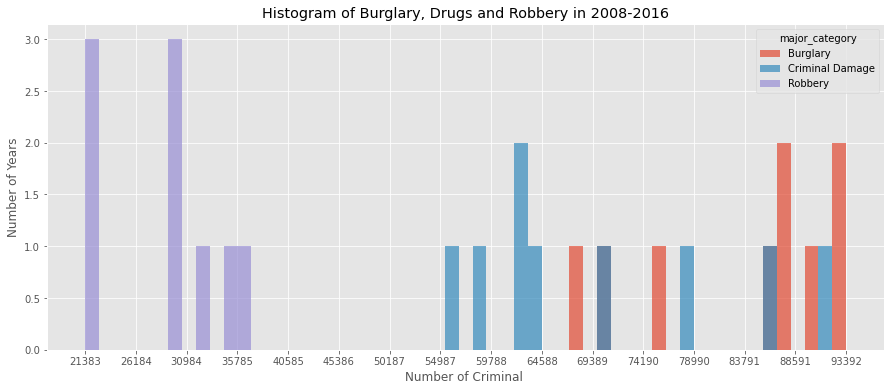

In [24]:
# Create Histogram (bin=55)

count, bin_edges = np.histogram(df_hist, 15)
df_hist.plot(kind ='hist',
    figsize=(15, 6),
    bins=55,
    alpha=0.7,
    xticks=bin_edges,
    )

plt.title('Histogram of Burglary, Drugs and Robbery in 2008-2016') 
plt.ylabel('Number of Years') 
plt.xlabel('Number of Criminal ') 

plt.show()

**Conclusion**

Dari histogram tersebut dapat disimpulkan bahwa frekuensi kasus kejahatan terbanyak selama 1 tahun dari 2008-2016 diantara Burglary, Criminal Damage, dan Robbery adalah:

Burglary
    

---
# C. Bar Chart


**Question:** Bagaimana gambaran tren kasus kejahatan "Violence Against the Person" secara tahunan dari 2008-2016?

**Create data visualization**

Membuat Bar Chart dengan Matplotlib

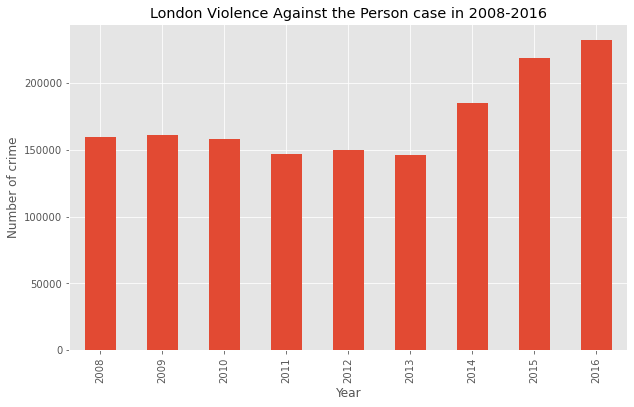

In [25]:
# Memilih kolom "Violance Against the Person" untuk divisualisasikan
df_bar = london_crime_majc['Violence Against the Person']

df_bar.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') 
plt.ylabel('Number of crime')
plt.title('London Violence Against the Person case in 2008-2016') 

plt.show()

**Conclusion**

Dapat dilihat dari bar chart, bahwa kasus "Violence Against the Person" dari tahun 2008-2016 di London cenderung menurun sejak 2010 namun mengalami kenaikan kasus pada tahun 2014 hingga 2016.

---
# D. Pie Chart

**Question:** Tampilkan Pie Chart untuk major_category dari 2008-2016, dan tentukan berapa persen proporsi untuk major_category "Theft and Handling" dan "Drugs".

**Pre-processing**

Melakukan transpose dataframe untuk mendapatkan visualisasi pie chart.

In [26]:
df_pie = london_crime_majc.transpose()
df_pie['total'] = london_crime_majc.sum()
df_pie

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


**Create data visualization**

Membuat pie chart dengan Matplotlib

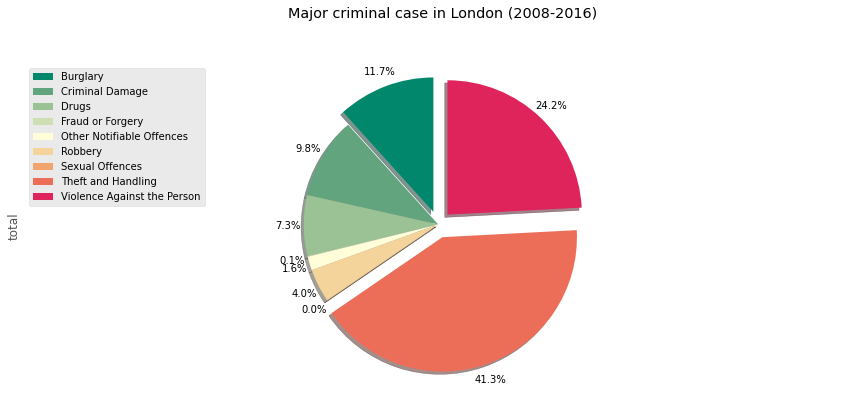

In [27]:
# ratio for each continent with which to offset each wedge.
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]
colors_list = ['#00876c','#61a47d','#9ac294','#cedfb3','#fffed8','#f4d49b','#f1a56d','#ec6e58','#de245b']

df_pie['total'].plot(kind='pie',
figsize=(15, 6),
autopct='%1.1f%%',
startangle=90,
shadow=True,
labels=None, 
colors=colors_list,
                        
# the ratio between the center of each pie slice and the start of the text generated by autopct
pctdistance=1.12,
explode=explode_list
)

# scale the title up by 12% to match pctdistance
plt.title('Major criminal case in London (2008-2016)', y=1.12)

plt.axis('equal')

# add legend
plt.legend(labels=df_pie.index, loc='upper left')

plt.show()

**Conclusion**

Dari pie chart tersebut, dapat dilihat proporsi berupa persen untuk semua jenis major_category criminal. Untuk proporsi major_category "Theft and Handling" dan "Drugs" adalah masing-masing sebesar **41,3%** dan **7.3%**.


---
# E. Box Plot

**Question**: Bandingkan distribusi dari total kasus kejahatan major_category "Burglary" dan "Criminal Damage" selama periode 2008-2016.

**Pre-processing**

Mengambil kolom yang dibutuhkan yakni "Burglary"  dan "Criminal Damage"

In [29]:
df_bplot = london_crime_majc[['Burglary', 'Criminal Damage']]
df_bplot

major_category,Burglary,Criminal Damage
year,,
2008,88092,91872
2009,90619,85565
2010,86826,77897
2011,93315,70914
2012,93392,62158
2013,87222,56206
2014,76053,59279
2015,70489,62976
2016,68285,64071


Melihat nilai pembagian data berdasarkan persentase dan juga parameter statistik lainnya menggunakan describe().

In [30]:
df_bplot.describe()

major_category,Burglary,Criminal Damage
count,9.000000,9.000000
mean,83810.333333,70104.222222
std,9658.166674,12424.545824
min,68285.000000,56206.000000
25%,76053.000000,62158.000000
50%,87222.000000,64071.000000
75%,90619.000000,77897.000000
max,93392.000000,91872.000000


**Create data visualization**

Membuat boxplot dengan menggunakan Matplotlib

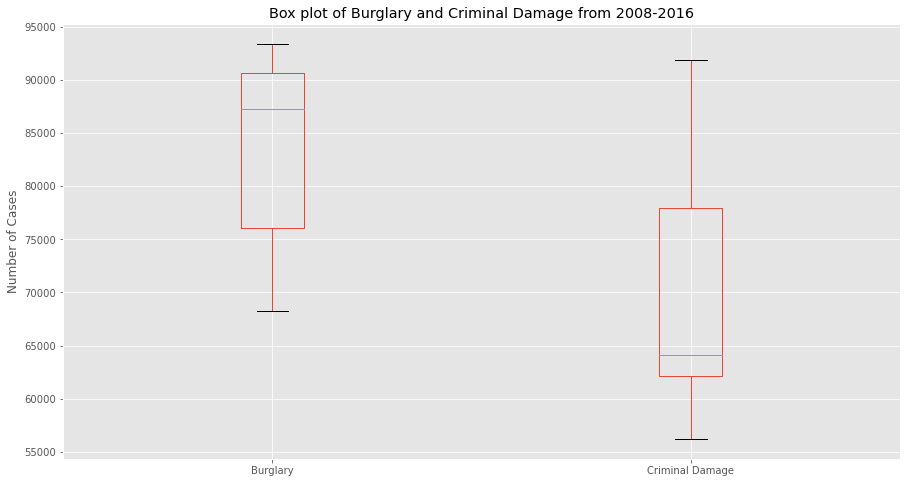

In [31]:
df_bplot.plot(kind='box', figsize=(15, 8))

plt.title('Box plot of Burglary and Criminal Damage from 2008-2016')
plt.ylabel('Number of Cases')

plt.show()

**Conclusion**

Berdasarkan kedua boxplot tersebut, dapat disimpulkan bahwa:
- Range jumlah kasus kejahatan "Criminal Damage" lebih tersebar daripada "Burglary". 
- Nilai maksimum dari kedua jenis kejahatan tersebut tidak jauh berbeda (~90.000), namun nilai minimum untuk "Criminal Damage"(56206) lebih rendah daripada "Burglary"(68285). 
- Posisi mean pada boxplot "Burglary" terletak mendekati Q3 sedangkan "Criminal Damage" mendekati Q1.
- Kedua jenis kejahatan ini tidak terdapat data outlier.

---
# F. Scatter Plot

**Question:** Visualisasikan tren jumlah kasus kejahatan (semua jenis major_category digabungkan) di London untuk tahun 2008-2016. Apa yang bisa disimpulkan dari plot yang terbentuk?

**Pre-processing**

In [33]:
london_crime_majc

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Melakukan copy dataset

In [34]:
df_sc = london_crime_majc.copy()
df_sc

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Setelah mendefinisikan df_sc, maka akan ditambahkan kolom 'total' yang merupakan total semua kasus major_category yang terjadi selama tahun tersebut, dan kemudian dilakukan reset index agar kolom year menjadi column.

In [35]:
df_sc['total'] = london_crime_majc.sum(axis=1)

# reset the index to put in back in as a column in the df_tot dataframe
df_sc.reset_index(inplace = True)
df_sc.index.name = None
df_sc

major_category,year,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,total
0,2008,88092,91872,68804,5325,10112,29627,1273,283692,159844,738641
1,2009,90619,85565,60549,0,10644,29568,0,279492,160777,717214
2,2010,86826,77897,58674,0,10768,32341,0,290924,157894,715324
3,2011,93315,70914,57550,0,10264,36679,0,309292,146901,724915
4,2012,93392,62158,51776,0,10675,35260,0,334054,150014,737329
5,2013,87222,56206,50278,0,10811,29337,0,306372,146181,686407
6,2014,76053,59279,44435,0,13037,22150,0,279880,185349,680183
7,2015,70489,62976,39785,0,14229,21383,0,284022,218740,711624
8,2016,68285,64071,38914,0,15809,22528,0,294133,232381,736121


Lalu melakukan select column "year" dan "total" untuk membuat scatter plot.

In [37]:
df_sc_2 = df_sc[['year','total']]
df_sc_2

major_category,year,total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


**Create data visualization**

Membuat scatter plot dengan Matplotlib

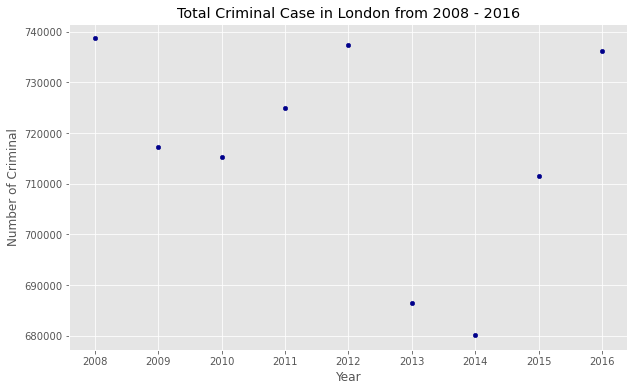

In [39]:
df_sc_2.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Criminal Case in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Criminal')

plt.show()

**Conclusion**

Dengan melihat scatter plot tersebut, dapat dilihat bahwa tren kasus kejahatan yang terjadi di London bersifat fluktuatif dimana pada tahun 2008-2012 mengalami penurunan lalu naik cukup drastis. Dari tahun 2012-2016 juga mengalami hal yang serupa dimana pada tahun 2013, kasus kejahatan mengalami penurunan yang signifikan hingga tahun 2014, namun selang 2 tahun berikutnya sampai tahun 2016, tren kasus kejahatan di London mengalami kenaikan kembali.

# G. Word Clouds

Import library yang dibutuhkan

In [44]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes
# !pip install wordcloud
# conda install -c https://conda.anaconda.org/conda-forge wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Melakukan set Stopwords untuk tidak mengikutsertakan kata-kata yang kurang informatif ke dalam Word Cloud.

In [45]:
stopwords = set(STOPWORDS)

Kemudian, dipilih sebuah kolom yang akan digunakan sebagai target untuk membuat visualisasi Word Clouds nya.

In [49]:
majc = ' '.join(df.major_category)

**Create data visualization**

Membuat word cloud dengan WordCloud()

In [53]:
# instantiate a word cloud object
mjc_wordcloud = WordCloud(
background_color='white',
max_words=2000,
stopwords=stopwords
)

# generate the word cloud
mjc_wordcloud .generate(majc)

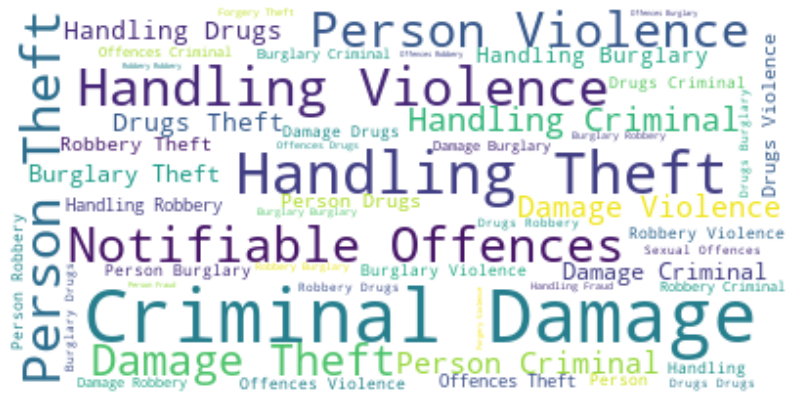

In [56]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(mjc_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# H.Folium Map

Import library yang dibutuhkan

In [57]:
import numpy as np  
import pandas as pd 

#conda install -c conda-forge folium=0.5.0 --yes
import folium

Mendefinisikan world map dengan folium.Map() untuk menampilkan peta dunia.

In [58]:
# define the world map
world_map = folium.Map()

# display world map
world_map

Mendefisinikan koordinat London untuk ditampilkan map nya.

In [64]:
# define the world map centered around London with a low zoom level
world_map = folium.Map(location=[51.485, -0.1], zoom_start=8)

# display world map
world_map

In [66]:
# define the world map centered around London with a low zoom level
world_map = folium.Map(location=[51.485, -0.1], zoom_start=11)

# display world map
world_map

# Overall Analysis

**A. Area Plot**

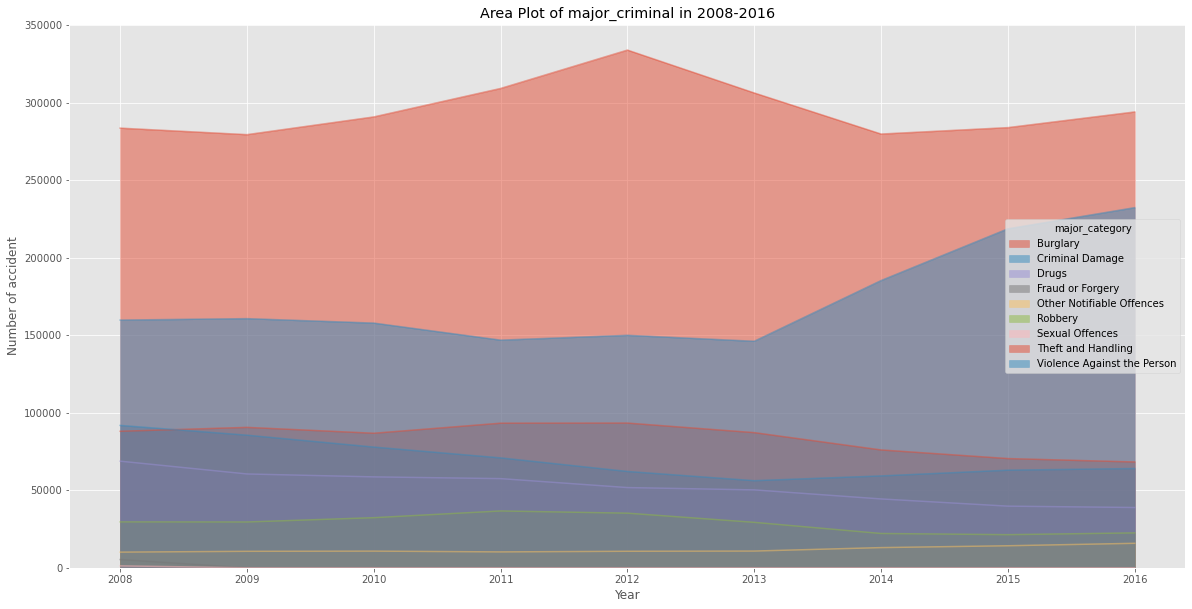

Dari Area Plot yang terbentuk dapat disimpulkan bahwa 2 kejahatan major_category paling banyak terjadi di London selama tahun 2008-2016 adalah:

1. Theft and Handling
2. Violenece Against the Person

**B. Histogram**

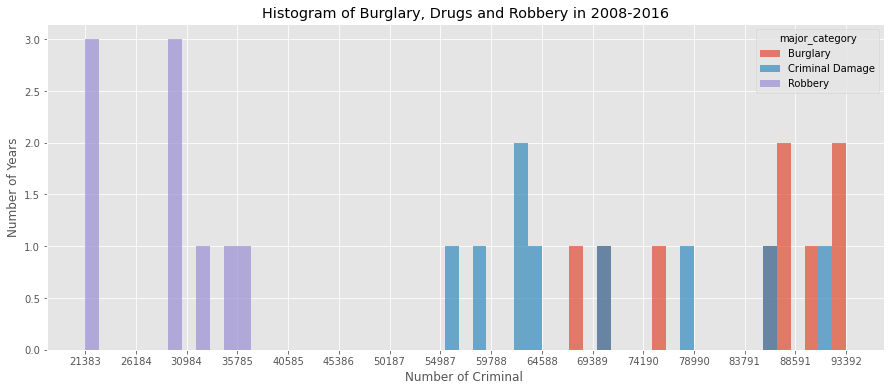

Dari histogram tersebut dapat disimpulkan bahwa frekuensi kasus kejahatan terbanyak selama 1 tahun dari 2008-2016 diantara Burglary, Criminal Damage, dan Robbery adalah:

Burglary

**C. Bar Chart**

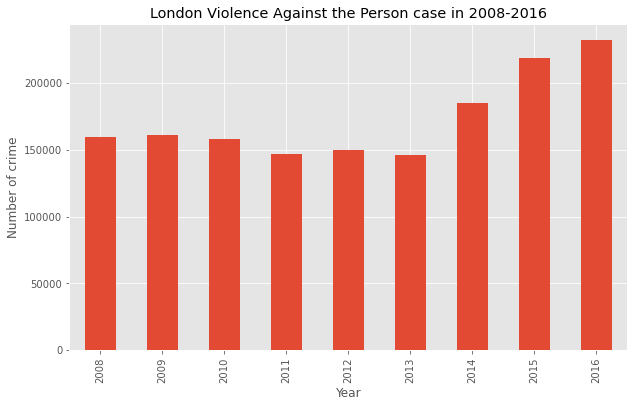

Dapat dilihat dari bar chart, bahwa kasus "Violence Against the Person" dari tahun 2008-2016 di London cenderung menurun sejak 2010 namun mengalami kenaikan kasus pada tahun 2014 hingga 2016.

**D. Pie Chart**

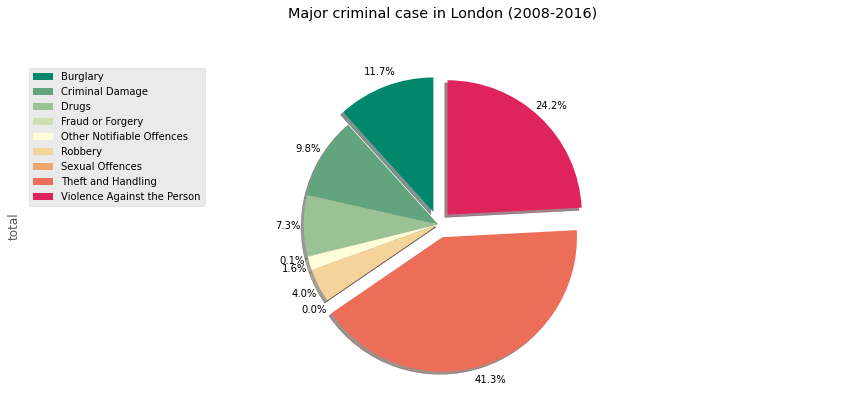

Dari pie chart tersebut, dapat dilihat proporsi berupa persen untuk semua jenis major_category criminal. Untuk proporsi major_category "Theft and Handling" dan "Drugs" adalah masing-masing sebesar 41,3% dan 7.3%.

**E. Box Plot**

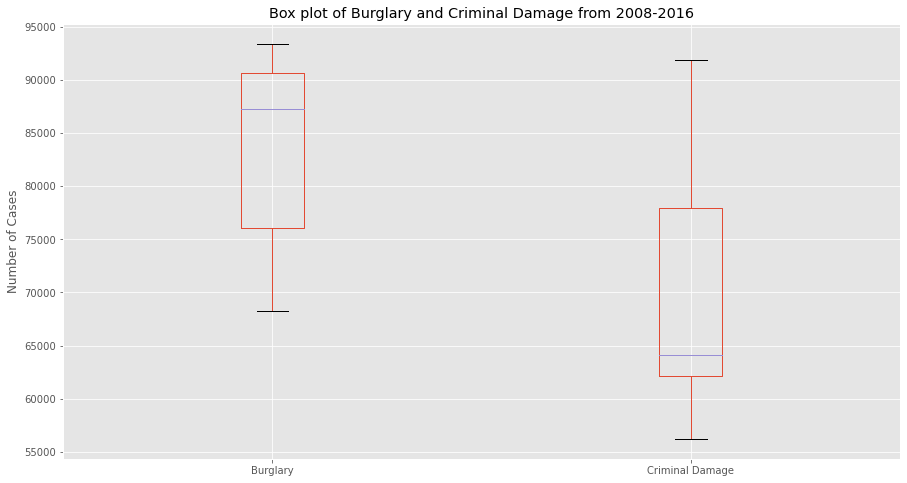

Berdasarkan kedua boxplot tersebut, dapat disimpulkan bahwa:
- Range jumlah kasus kejahatan "Criminal Damage" lebih tersebar daripada "Burglary". 
- Nilai maksimum dari kedua jenis kejahatan tersebut tidak jauh berbeda (~90.000), namun nilai minimum untuk "Criminal Damage"(56206) lebih rendah daripada "Burglary"(68285). 
- Posisi mean pada boxplot "Burglary" terletak mendekati Q3 sedangkan "Criminal Damage" mendekati Q1.
- Kedua jenis kejahatan ini tidak terdapat data outlier.

**F. Scatter Plot**

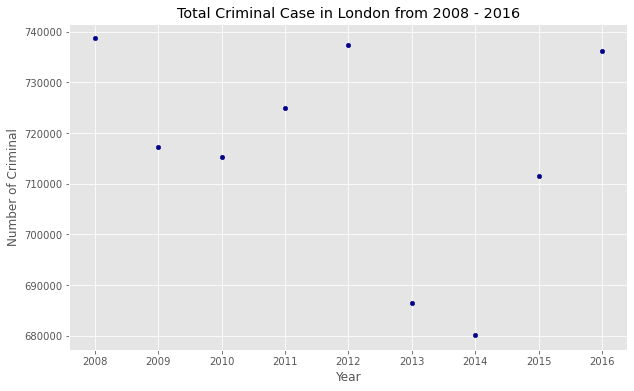

Dengan melihat scatter plot tersebut, dapat dilihat bahwa tren kasus kejahatan yang terjadi di London bersifat fluktuatif dimana pada tahun 2008-2012 mengalami penurunan lalu naik cukup drastis. Dari tahun 2012-2016 juga mengalami hal yang serupa dimana pada tahun 2013, kasus kejahatan mengalami penurunan yang signifikan hingga tahun 2014, namun selang 2 tahun berikutnya sampai tahun 2016, tren kasus kejahatan di London mengalami kenaikan kembali.

**G. Word Cloud**

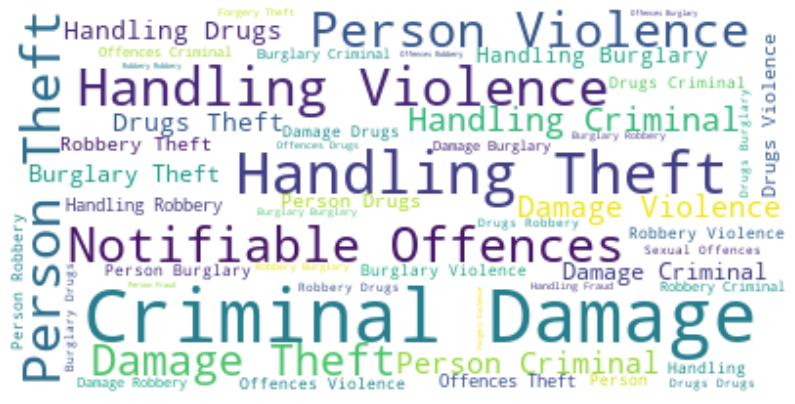

**H. Folium Map**

In [67]:
# define the world map centered around London with a low zoom level
world_map = folium.Map(location=[51.485, -0.1], zoom_start=11)

# display world map
world_map